# DOCUMENT SIMILARITY 

In [1]:
import pandas as pd
import nltk
import string

from os import listdir
from os.path import isfile, join

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

## STEP 1. DATA PRE-PROCESSING

### 1.1 Read Files

In [2]:
DATA_DIR = "./data/"

def getFileInformations(folderPath):
    fileInformations = []
    listOfFileNames = [fileName for fileName in listdir(folderPath) if isfile(join(folderPath, fileName))]
    listOfFilePaths = [join(folderPath, fileName) for fileName in listdir(folderPath) if isfile(join(folderPath, fileName))]
    fileInformations.append(listOfFileNames)
    fileInformations.append(listOfFilePaths)
    return fileInformations
fileNames, filePaths = getFileInformations(DATA_DIR)
print("FILE NAMES")
print(fileNames)
print("\n")
print("FILE PATHS")
print(filePaths)



FILE NAMES
['doc6.txt', 'doc1.txt', 'doc4.txt', 'doc2.txt', 'doc5.txt', 'doc3.txt']


FILE PATHS
['./data/doc6.txt', './data/doc1.txt', './data/doc4.txt', './data/doc2.txt', './data/doc5.txt', './data/doc3.txt']


In [3]:
def create_docContentDict(filePaths):
    rawContentDict = {}
    for filePath in filePaths:
        with open(filePath, "r") as ifile:
            fileContent = ifile.read()
        rawContentDict[filePath] = fileContent
    return rawContentDict
rawContentDict = create_docContentDict(filePaths)
print(rawContentDict)

{'./data/doc6.txt': 'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor fine ut labore et tura magna hjhd. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris lash ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat time pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n', './data/doc1.txt': 'exact other Saturday, Master Rick of the Seattle Zen Monastery asked me to sweep the courtyard with a brittle straw broom. This week was more than the usual load: pigeons had left their excrement over the courtyard–which meant I had to mop up their mess after sweeping. Despite this extra work, the words of Master Rick–a tall, straw-thin man in his 60s–echoed in my mind: “Sweep like you are sweeping your thoughts away–one at a time.” I wasn’t sure if it was a mystical statement or just an excuse to get a 17-year-old

### 1.2 CLEAN DATA

#### 1.2.1 Tokenize

Tokenizers divide strings into lists of substrings. For example, tokenizers can be used to find the words and punctuation in a string:

In [4]:
def getTokenizedData(rawData):
    return nltk.tokenize.word_tokenize(rawData)

#### 1.2.2 Remove Stop words

Stopwords are the English words which does not add much meaning to a sentence.

In [5]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
def removeStopWords(rawData):
    stop_word_set = set(nltk.corpus.stopwords.words("english"))
    return  [word for word in rawData if word not in stop_word_set] 

#### 1.2.3 Stemming

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”. 

Porter’s Stemmer algorithm 

It is based on the idea that the suffixes in the English language are made up of a combination of smaller and simpler suffixes

In [7]:
def performPorterStemming(rawData):
    porterStemmer = nltk.stem.PorterStemmer()
    return [porterStemmer.stem(word) for word in rawData]

#### 1.2.4 Remove White Space

In [8]:
def removeSpace(rawDate):
    return [word.strip() for word in rawDate]

#### 1.2.5 Remove Punctuation

In [9]:
def removePunctuations(rawData):
    excludePuncuation = set(string.punctuation)
    excludePuncuation.update(['\'\'','--','``','“','”',', ','’'])
    return [word for word in rawData if word not in excludePuncuation]

#### 1.2.6 Convert To Lowercase

In [10]:
def convertItemsToLower(rawData):
    return  [term.lower() for term in rawData] 

#### 1.2.7 Summerize Cleanup

In [11]:
def cleanData(rawContents):
    cleaned = getTokenizedData(rawContents)
    cleaned = removeStopWords(cleaned)
    cleaned = performPorterStemming(cleaned)   
    cleaned = removeSpace(cleaned)    
    cleaned = removePunctuations(cleaned)
    cleaned = convertItemsToLower(cleaned)
    return cleaned

In [13]:
a=cleanData(rawContentDict[filePaths[3]])
print(a)

['everi', 'saturday', 'master', 'rick', 'seattl', 'zen', 'monasteri', 'ask', 'sweep', 'courtyard', 'brittl', 'straw', 'broom', 'thi', 'week', 'usual', 'load', 'pigeon', 'left', 'excrement', 'courtyard–which', 'meant', 'i', 'mop', 'mess', 'sweep', 'despit', 'extra', 'work', 'word', 'master', 'rick–a', 'tall', 'straw-thin', 'man', '60s–echo', 'mind', 'sweep', 'like', 'sweep', 'thought', 'away–on', 'time.', 'i', 'sure', 'mystic', 'statement', 'excus', 'get', '17-year-old', 'chore', 'but', 'matter', 'i', 'thought', 'i', 'duti', 'end']


## STEP 2 :PROCESS SIMILARITY

#### Term Frequency (TF)
The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency. 

#### Inverse Data Frequency (IDF)

The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

In [15]:
tfidf = TfidfVectorizer(tokenizer=cleanData, stop_words='english')
tfs = tfidf.fit_transform(rawContentDict.values())
#print("--------------tf Values---------------------------------")
tfs_Values = tfs.toarray()
#print(tfs_Values)
#print("--------------tfs Terms     ----------------------------")
tfs_Term = tfidf.get_feature_names()
#print(tfs_Term)

skDocsTfIdfdf = pd.DataFrame(tfs.todense(),index=(fileNames),  columns=(tfs_Term))
print(skDocsTfIdfdf.T)

             doc6.txt  doc1.txt  doc4.txt  doc2.txt  doc5.txt  doc3.txt
17-year-old  0.000000  0.119437  0.124768  0.120023       0.0  0.000000
60s–echo     0.000000  0.119437  0.124768  0.120023       0.0  0.000000
ad           0.111146  0.000000  0.000000  0.000000       0.0  0.107243
adipisc      0.111146  0.000000  0.000000  0.000000       0.0  0.107243
aliqua       0.000000  0.000000  0.000000  0.000000       0.0  0.130782
...               ...       ...       ...       ...       ...       ...
volupt       0.111146  0.000000  0.000000  0.000000       0.0  0.107243
week         0.000000  0.119437  0.124768  0.120023       0.0  0.000000
word         0.000000  0.119437  0.124768  0.120023       0.0  0.000000
work         0.000000  0.119437  0.124768  0.120023       0.0  0.000000
zen          0.000000  0.119437  0.124768  0.120023       0.0  0.000000

[122 rows x 6 columns]


In [16]:
#compute cosine similarity
cosineSimilarity = cosine_similarity(tfs,tfs)
cosineSimilarityDf = pd.DataFrame(cosineSimilarity,index=(fileNames),columns=(fileNames))
sortedDateFrame=cosineSimilarityDf.sort_index().sort_index(axis=1, ascending=True)
print(sortedDateFrame)

          doc1.txt  doc2.txt  doc3.txt  doc4.txt  doc5.txt  doc6.txt
doc1.txt  1.000000  0.975002  0.000000  0.819606       0.0  0.000000
doc2.txt  0.975002  1.000000  0.000000  0.844640       0.0  0.000000
doc3.txt  0.000000  0.000000  1.000000  0.000000       0.0  0.917814
doc4.txt  0.819606  0.844640  0.000000  1.000000       0.0  0.016426
doc5.txt  0.000000  0.000000  0.000000  0.000000       1.0  0.000000
doc6.txt  0.000000  0.000000  0.917814  0.016426       0.0  1.000000


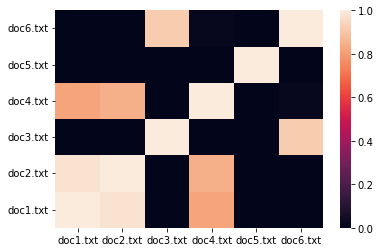

In [17]:
import seaborn as sns
p1 = sns.heatmap(cosineSimilarityDf.sort_index(axis=0, ascending=False).sort_index(axis=1, ascending=True))